In [1]:
# importing packages
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, Normalizer
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, roc_curve, auc
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV, LeaveOneOut, KFold

In [2]:
#Data
print(os.getcwd())

data_dir = os.getcwd() + "\\Kaggle\\Dataset_TBI.xlsx"
print(data_dir)

F:\CTSN_TBI\Machine_learning\GBM algorithm
F:\CTSN_TBI\Machine_learning\GBM algorithm\Kaggle\Dataset_TBI.xlsx


In [3]:
df_tbi = pd.read_excel(data_dir,index_col=0)
df_tbi.head()

,Age,Sex,Marshall (t0),Entry Diagnosis (t0),CRS-R (t1),RLAS (t1),DRS (t1),ERBI A (t1),ERBI B (t1),GOS-E (t1),Diagnosis at Discharge (t2),CRS-R (t2),RLAS (t2),DRS (t2),ERBI A (t2),ERBI B (t2),GOS-E (t2)
Subject,,,,,,,,,,,,,,,,,
S1,76,M,V,MCS,10.0,3,18,-175,0,3,DEATH,NaN,NaN,30.0,NaN,NaN,1
S2,28,M,III,MCS,8.0,3,20,-125,0,2,EMERSION,23.0,7.0,8.0,0.0,60.0,4
S3,20,F,II,MCS,9.0,3,18,-175,0,2,EMERSION,23.0,7.0,6.0,0.0,70.0,4
S4,22,M,II,EMERSION,23.0,4,15,-175,0,3,EMERSION,23.0,7.0,3.0,0.0,100.0,7
S5,62,M,II,EMERSION,23.0,4,15,-100,5,3,EMERSION,23.0,6.0,10.0,-50.0,90.0,3


### Data exploration

In [4]:
df_tbi = pd.read_excel(data_dir)
df_tbi1 = df_tbi.drop("Subject", axis = 1)
df_tbi.info()
df_tbi.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Subject                      102 non-null    object 
 1   Age                          102 non-null    int64  
 2   Sex                          102 non-null    object 
 3   Marshall (t0)                99 non-null     object 
 4   Entry Diagnosis (t0)         102 non-null    object 
 5   CRS-R (t1)                   101 non-null    float64
 6   RLAS (t1)                    102 non-null    int64  
 7   DRS (t1)                     102 non-null    int64  
 8   ERBI A (t1)                  102 non-null    int64  
 9   ERBI B (t1)                  102 non-null    int64  
 10  GOS-E (t1)                   102 non-null    int64  
 11  Diagnosis at Discharge (t2)  102 non-null    object 
 12  CRS-R (t2)                   90 non-null     float64
 13  RLAS (t2)           

Index(['Subject', 'Age', 'Sex', 'Marshall (t0)', 'Entry Diagnosis (t0)',
       'CRS-R (t1)', 'RLAS (t1)', 'DRS (t1)', 'ERBI A (t1)', 'ERBI B (t1)',
       'GOS-E (t1)', 'Diagnosis at Discharge (t2)', 'CRS-R (t2)', 'RLAS (t2)',
       'DRS (t2)', 'ERBI A (t2)', 'ERBI B (t2)', 'GOS-E (t2)'],
      dtype='object')

In [5]:
null_df = pd.DataFrame(df_tbi.isnull().sum())
null_df[null_df[0]>0]

,0
Marshall (t0),3
CRS-R (t1),1
CRS-R (t2),12
RLAS (t2),12
DRS (t2),2
ERBI A (t2),12
ERBI B (t2),12


## Data processing

### Encoding

In [6]:
df_tbi4 = df_tbi.copy()

In [7]:
from sklearn import preprocessing 
from sklearn.preprocessing import OneHotEncoder

In [8]:
mapping = {
    'II': '2',
    'III': '3',
    'IV': '4',
    'V': '5',
    'VI': '6'}
df_tbi4['Marshall (t0)'] = df_tbi4['Marshall (t0)'].replace(mapping)

### Label encoding

In [9]:
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
df_tbi4['Sex']= label_encoder.fit_transform(df_tbi4['Sex']) 
df_tbi4['Entry Diagnosis (t0)']= label_encoder.fit_transform(df_tbi4['Entry Diagnosis (t0)'])
df_tbi4['Diagnosis at Discharge (t2)']= label_encoder.fit_transform(df_tbi4['Diagnosis at Discharge (t2)'])
df_tbi4x= df_tbi4.drop('Subject', 1, errors='ignore')

df_tbi4x.head() 

C:\Users\HANGO\AppData\Local\Temp\ipykernel_18496\3641519914.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_tbi4x= df_tbi4.drop('Subject', 1, errors='ignore')


,Age,Sex,Marshall (t0),Entry Diagnosis (t0),CRS-R (t1),RLAS (t1),DRS (t1),ERBI A (t1),ERBI B (t1),GOS-E (t1),Diagnosis at Discharge (t2),CRS-R (t2),RLAS (t2),DRS (t2),ERBI A (t2),ERBI B (t2),GOS-E (t2)
0,76,1,5,2,10.0,3,18,-175,0,3,0,NaN,NaN,30.0,NaN,NaN,1
1,28,1,3,2,8.0,3,20,-125,0,2,1,23.0,7.0,8.0,0.0,60.0,4
2,20,0,2,2,9.0,3,18,-175,0,2,1,23.0,7.0,6.0,0.0,70.0,4
3,22,1,2,0,23.0,4,15,-175,0,3,1,23.0,7.0,3.0,0.0,100.0,7
4,62,1,2,0,23.0,4,15,-100,5,3,1,23.0,6.0,10.0,-50.0,90.0,3


In [10]:
scaler = StandardScaler()
df_new_tbi_target = df_tbi['GOS-E (t2)']
df_new_array = scaler.fit_transform(df_tbi4x)
df_tbi_f = pd.DataFrame(df_new_array)
df_tbi_f.columns = df_tbi4x.columns.to_list()
df_tbi_f

,Age,Sex,Marshall (t0),Entry Diagnosis (t0),CRS-R (t1),RLAS (t1),DRS (t1),ERBI A (t1),ERBI B (t1),GOS-E (t1),Diagnosis at Discharge (t2),CRS-R (t2),RLAS (t2),DRS (t2),ERBI A (t2),ERBI B (t2),GOS-E (t2)
0,1.380828,0.630286,1.087012,0.673219,-0.818321,-0.585028,-0.156150,-0.295498,-0.251339,0.853706,-1.149958,NaN,NaN,2.075281,NaN,NaN,-1.389551
1,-0.960077,0.630286,-0.377127,0.673219,-1.074205,-0.585028,0.305510,0.381824,-0.251339,-1.171364,-0.261354,0.427507,0.682187,-0.498348,0.452267,0.106384,-0.043973
2,-1.350228,-1.586582,-1.109196,0.673219,-0.946263,-0.585028,-0.156150,-0.295498,-0.251339,-1.171364,-0.261354,0.427507,0.682187,-0.732315,0.452267,0.368701,-0.043973
3,-1.252690,0.630286,-1.109196,-0.869890,0.844923,0.043107,-0.848640,-0.295498,-0.251339,0.853706,-0.261354,0.427507,0.682187,-1.083264,0.452267,1.155651,1.301605
4,0.698064,0.630286,-1.109196,-0.869890,0.844923,0.043107,-0.848640,0.720485,1.030489,0.853706,-0.261354,0.427507,0.080257,-0.264382,-0.452267,0.893335,-0.492499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,-1.398997,-1.586582,-1.109196,-0.869890,0.844923,1.927514,-1.310300,1.397807,-0.251339,0.853706,-0.261354,0.427507,1.284116,-1.434213,0.452267,1.155651,1.750131
98,1.868516,0.630286,1.087012,-0.869890,0.844923,0.671243,-0.156150,0.720485,-0.251339,0.853706,-0.261354,0.427507,-0.521672,0.671483,0.452267,-1.467517,-0.492499
99,1.380828,0.630286,-1.109196,-0.869890,0.844923,1.299378,-0.156150,2.075130,-0.251339,0.853706,-0.261354,0.427507,0.682187,0.203551,0.452267,-0.680566,-0.492499
100,-1.252690,0.630286,1.087012,-0.869890,0.844923,1.927514,-2.464451,2.075130,2.312317,0.853706,-0.261354,0.427507,0.682187,-0.615331,0.452267,-1.336358,-0.492499


In [11]:
knn_imputer = KNNImputer(n_neighbors=5)
df_tbi5 = pd.DataFrame(knn_imputer.fit_transform(df_tbi_f), columns=df_tbi_f.columns)
df_tbi5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          102 non-null    float64
 1   Sex                          102 non-null    float64
 2   Marshall (t0)                102 non-null    float64
 3   Entry Diagnosis (t0)         102 non-null    float64
 4   CRS-R (t1)                   102 non-null    float64
 5   RLAS (t1)                    102 non-null    float64
 6   DRS (t1)                     102 non-null    float64
 7   ERBI A (t1)                  102 non-null    float64
 8   ERBI B (t1)                  102 non-null    float64
 9   GOS-E (t1)                   102 non-null    float64
 10  Diagnosis at Discharge (t2)  102 non-null    float64
 11  CRS-R (t2)                   102 non-null    float64
 12  RLAS (t2)                    102 non-null    float64
 13  DRS (t2)            

In [12]:
df_tbi5x= df_tbi5.drop('GOS-E (t2)', 1, errors='ignore')
df_tbi5x.head()

C:\Users\HANGO\AppData\Local\Temp\ipykernel_18496\3779281919.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_tbi5x= df_tbi5.drop('GOS-E (t2)', 1, errors='ignore')


,Age,Sex,Marshall (t0),Entry Diagnosis (t0),CRS-R (t1),RLAS (t1),DRS (t1),ERBI A (t1),ERBI B (t1),GOS-E (t1),Diagnosis at Discharge (t2),CRS-R (t2),RLAS (t2),DRS (t2),ERBI A (t2),ERBI B (t2)
0,1.380828,0.630286,1.087012,0.673219,-0.818321,-0.585028,-0.15615,-0.295498,-0.251339,0.853706,-1.149958,0.427507,-0.401286,2.075281,0.452267,-0.890420
1,-0.960077,0.630286,-0.377127,0.673219,-1.074205,-0.585028,0.30551,0.381824,-0.251339,-1.171364,-0.261354,0.427507,0.682187,-0.498348,0.452267,0.106384
2,-1.350228,-1.586582,-1.109196,0.673219,-0.946263,-0.585028,-0.15615,-0.295498,-0.251339,-1.171364,-0.261354,0.427507,0.682187,-0.732315,0.452267,0.368701
3,-1.252690,0.630286,-1.109196,-0.869890,0.844923,0.043107,-0.84864,-0.295498,-0.251339,0.853706,-0.261354,0.427507,0.682187,-1.083264,0.452267,1.155651
4,0.698064,0.630286,-1.109196,-0.869890,0.844923,0.043107,-0.84864,0.720485,1.030489,0.853706,-0.261354,0.427507,0.080257,-0.264382,-0.452267,0.893335


In [13]:
selected_columns = ["CRS-R (t2)", "ERBI B (t2)", "DRS (t2)", "Age", "Marshall (t0)"]  # Replace with the names of the columns you want to select
# Select the columns
df_select = df_tbi5x[selected_columns]
df_select.head()

,CRS-R (t2),ERBI B (t2),DRS (t2),Age,Marshall (t0)
0,0.427507,-0.890420,2.075281,1.380828,1.087012
1,0.427507,0.106384,-0.498348,-0.960077,-0.377127
2,0.427507,0.368701,-0.732315,-1.350228,-1.109196
3,0.427507,1.155651,-1.083264,-1.252690,-1.109196
4,0.427507,0.893335,-0.264382,0.698064,-1.109196


## Model training

In [14]:
# Define the models
svm_model = make_pipeline(SVC())
logreg_model = make_pipeline(LogisticRegression())
dt_model = make_pipeline(DecisionTreeClassifier())
knn_model = make_pipeline(KNeighborsClassifier(n_neighbors=5))
gnb = make_pipeline(GaussianNB())
rf = make_pipeline(RandomForestClassifier(n_estimators=100))

# Create a list of models
models = [logreg_model]

### 4 class

In [15]:
df_tbi4['GOS-E (t2)'] = df_tbi4['GOS-E (t2)'].apply(lambda x: 1 if 1 <= x <= 2 else x)
df_tbi4['GOS-E (t2)'] = df_tbi4['GOS-E (t2)'].apply(lambda x: 2 if 3 <= x <= 4 else x)
df_tbi4['GOS-E (t2)'] = df_tbi4['GOS-E (t2)'].apply(lambda x: 3 if 5 <= x <= 6 else x)
df_tbi4['GOS-E (t2)'] = df_tbi4['GOS-E (t2)'].apply(lambda x: 4 if 7 <= x <= 8 else x)

In [16]:
X = df_select
#X=(df_tbi4x.iloc[:,1:]).drop(columns=["GOS-E (t2)"]) # Features
y = df_tbi4["GOS-E (t2)"]   # Target variable

In [17]:
#### SMOTE
from imblearn.over_sampling import SMOTE
# Apply SMOTE to address class imbalance
smote = SMOTE(random_state= None)
X_resampled, y_resampled = smote.fit_resample(X, y)
print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_resampled.shape}''')

Shape of X before SMOTE: (102, 5)
Shape of X after SMOTE: (152, 5)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

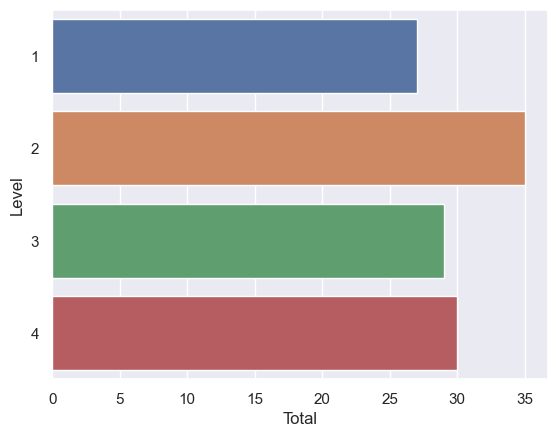

In [19]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data=X_train )
sns.color_palette("husl", 8)
plt.ylabel('Level')
plt.xlabel('Total')
plt.show()

In [20]:
print(y.value_counts())

2    38
4    29
1    26
3     9
Name: GOS-E (t2), dtype: int64


In [21]:
# print(X.value_counts())

#### LOOCV

In [22]:
# Initialize lists to store results
accuracy_scores = []
f1_scores = []
sensitivity_scores = []
specificity_scores = []
conf_matrices = []

# Use leave-one-out cross-validation for evaluation
loo = LeaveOneOut()

# Iterate over models
for model in models:
    # Perform grid search with cross-validation
    y_true = []
    y_pred = []
    for train_index, test_index in loo.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index],y.iloc[test_index]
        
        # Train model on training data
        model.fit(X_train, y_train)
        
        # Predict on test data
        y_pred.extend(model.predict(X_test))
        y_true.extend(y_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')  # Specify average='weighted' for multiclass
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Calculate sensitivity and specificity for each class
    sensitivity = []
    specificity = []
    for i in range(conf_matrix.shape[0]):
        tp = conf_matrix[i, i]
        fn = np.sum(conf_matrix[i, :]) - tp
        fp = np.sum(conf_matrix[:, i]) - tp
        tn = np.sum(conf_matrix) - tp - fn - fp
        
        sensitivity.append(tp / (tp + fn))
        specificity.append(tn / (tn + fp))
    
    # Append mean sensitivity and specificity to lists
    sensitivity_scores.append(np.mean(sensitivity))
    specificity_scores.append(np.mean(specificity))
    
    # Append results to lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    # Print results
for i, model in enumerate(models):
    print(f"Model {i+1}: {list(model.named_steps.keys())} - Accuracy: {accuracy_scores[i]}, F1 Score: {f1_scores[i]}")
    print(f"Mean Sensitivity (Recall): {sensitivity_scores[i]}, Mean Specificity: {specificity_scores[i]}")


Model 1: ['logisticregression'] - Accuracy: 0.8431372549019608, F1 Score: 0.8067780836297326
Mean Sensitivity (Recall): 0.6968274466005864, Mean Specificity: 0.9418343321917808


In [23]:
# Initialize lists to store results
accuracy_scores = []
f1_scores = []
sensitivity_scores = []
specificity_scores = []
conf_matrices = []

# Use leave-one-out cross-validation for evaluation
loo = LeaveOneOut()

# Iterate over models
for model in models:
    # Perform grid search with cross-validation
    y_true = []
    y_pred = []
    for train_index, test_index in loo.split(X_resampled):
        X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
        y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]
        
        # Train model on training data
        model.fit(X_train, y_train)
        
        # Predict on test data
        y_pred.extend(model.predict(X_test))
        y_true.extend(y_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')  # Specify average='weighted' for multiclass
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Calculate sensitivity and specificity for each class
    sensitivity = []
    specificity = []
    for i in range(conf_matrix.shape[0]):
        tp = conf_matrix[i, i]
        fn = np.sum(conf_matrix[i, :]) - tp
        fp = np.sum(conf_matrix[:, i]) - tp
        tn = np.sum(conf_matrix) - tp - fn - fp
        
        sensitivity.append(tp / (tp + fn))
        specificity.append(tn / (tn + fp))
    
    # Append mean sensitivity and specificity to lists
    sensitivity_scores.append(np.mean(sensitivity))
    specificity_scores.append(np.mean(specificity))
    
    # Append results to lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

# Print results
for i, model in enumerate(models):
    print(f"Model {i+1}: {list(model.named_steps.keys())} - Accuracy: {accuracy_scores[i]}, F1 Score: {f1_scores[i]}")
    print(f"Mean Sensitivity (Recall): {sensitivity_scores[i]}, Mean Specificity: {specificity_scores[i]}")


Model 1: ['logisticregression'] - Accuracy: 0.868421052631579, F1 Score: 0.8677673788250754
Mean Sensitivity (Recall): 0.868421052631579, Mean Specificity: 0.956140350877193


#### k fold

In [24]:
# Initialize lists to store results
accuracy_scores = []
f1_scores = []
sensitivity_scores = []
specificity_scores = []
conf_matrices = []

# Use leave-one-out cross-validation for evaluation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Iterate over models
for model in models:
    # Perform grid search with cross-validation
    y_true = []
    y_pred = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index],y.iloc[test_index]
        
        # Train model on training data
        model.fit(X_train, y_train)
        
        # Predict on test data
        y_pred.extend(model.predict(X_test))
        y_true.extend(y_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')  # Specify average='weighted' for multiclass
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Calculate sensitivity and specificity for each class
    sensitivity = []
    specificity = []
    for i in range(conf_matrix.shape[0]):
        tp = conf_matrix[i, i]
        fn = np.sum(conf_matrix[i, :]) - tp
        fp = np.sum(conf_matrix[:, i]) - tp
        tn = np.sum(conf_matrix) - tp - fn - fp
        
        sensitivity.append(tp / (tp + fn))
        specificity.append(tn / (tn + fp))
    
    # Append mean sensitivity and specificity to lists
    sensitivity_scores.append(np.mean(sensitivity))
    specificity_scores.append(np.mean(specificity))
    
    # Append results to lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

# Print results
for i, model in enumerate(models):
    print(f"Model {i+1}: {list(model.named_steps.keys())} - Accuracy: {accuracy_scores[i]}, F1 Score: {f1_scores[i]}")
    print(f"Mean Sensitivity (Recall): {sensitivity_scores[i]}, Mean Specificity: {specificity_scores[i]}")


Model 1: ['logisticregression'] - Accuracy: 0.8431372549019608, F1 Score: 0.8068500127323657
Mean Sensitivity (Recall): 0.6998638838475499, Mean Specificity: 0.9423159246575342


In [25]:
# Initialize lists to store results
accuracy_scores = []
f1_scores = []
sensitivity_scores = []
specificity_scores = []
conf_matrices = []

# Use leave-one-out cross-validation for evaluation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Iterate over models
for model in models:
    # Perform grid search with cross-validation
    y_true = []
    y_pred = []
    for train_index, test_index in kf.split(X_resampled):
        X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
        y_train, y_test = y_resampled.iloc[train_index],y_resampled.iloc[test_index]
        
        # Train model on training data
        model.fit(X_train, y_train)
        
        # Predict on test data
        y_pred.extend(model.predict(X_test))
        y_true.extend(y_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')  # Specify average='weighted' for multiclass
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Calculate sensitivity and specificity for each class
    sensitivity = []
    specificity = []
    for i in range(conf_matrix.shape[0]):
        tp = conf_matrix[i, i]
        fn = np.sum(conf_matrix[i, :]) - tp
        fp = np.sum(conf_matrix[:, i]) - tp
        tn = np.sum(conf_matrix) - tp - fn - fp
        
        sensitivity.append(tp / (tp + fn))
        specificity.append(tn / (tn + fp))
    
    # Append mean sensitivity and specificity to lists
    sensitivity_scores.append(np.mean(sensitivity))
    specificity_scores.append(np.mean(specificity))
    
    # Append results to lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

# Print results
for i, model in enumerate(models):
    print(f"Model {i+1}: {list(model.named_steps.keys())} - Accuracy: {accuracy_scores[i]}, F1 Score: {f1_scores[i]}")
    print(f"Mean Sensitivity (Recall): {sensitivity_scores[i]}, Mean Specificity: {specificity_scores[i]}")


Model 1: ['logisticregression'] - Accuracy: 0.8421052631578947, F1 Score: 0.8412808741756109
Mean Sensitivity (Recall): 0.8421052631578947, Mean Specificity: 0.9473684210526316


In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Create a model (Random Forest Classifier)
model = RandomForestClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200)

# Perform Leave-One-Out Cross-Validation
k_fold = KFold(n_splits=10)
y_pred = cross_val_predict(model, X_resampled, y_resampled, cv=k_fold)

# Calculate accuracy
accuracy = accuracy_score(y_resampled, y_pred)
print("Mean Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_resampled, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculate sensitivity (recall)
sensitivity = recall_score(y_resampled, y_pred, average='weighted')
print("Sensitivity:", sensitivity)

# Calculate specificity
# Since specificity is not directly supported by sklearn, we need to calculate it manually
# Specificity = TN / (TN + FP)
# Where TN is True Negative and FP is False Positive
conf_matrix = confusion_matrix(y_resampled, y_pred)
specificity = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
print("Specificity:", specificity)


#### GridSearch CV

In [ ]:
# Define the models with their hyperparameter grids
svm_model = make_pipeline(SVC())
svm_param_grid = {'svc__kernel': ['linear', 'rbf']}

logreg_model = make_pipeline(LogisticRegression(max_iter=1000))
logreg_param_grid = {'logisticregression__C': [0.1, 1, 10]}


dt_model = make_pipeline(DecisionTreeClassifier())
dt_param_grid = {'decisiontreeclassifier__max_depth': [None, 10, 20], 'decisiontreeclassifier__min_samples_split': [2, 5, 10]}

knn_model = make_pipeline(KNeighborsClassifier())
knn_param_grid = {'kneighborsclassifier__n_neighbors': [3, 5, 7]}

gnb_model = make_pipeline( GaussianNB())


# Create a list of models with their corresponding parameter grids
models = [
    (logreg_model, logreg_param_grid),
    (svm_model, svm_param_grid),
    (dt_model, dt_param_grid),
    (knn_model, knn_param_grid),
    (gnb_model, {}),  # GaussianNB does not have specific hyperparameters to tune
]


In [ ]:
# Initialize lists to store results
accuracy_scores = []
f1_scores = []
sensitivity_scores = []
specificity_scores = []
conf_matrices = []

# Use leave-one-out cross-validation for evaluation
k_fold = KFold(n_splits=10)

# Iterate over models
for model, param_grid in models:
    # Perform grid search with cross-validation
    grid_search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')
    grid_search.fit(X, y)
    
    # Get best estimator
    best_model = grid_search.best_estimator_
    
    y_true = []
    y_pred = []
    for train_index, test_index in loo.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Train model on training data
        best_model.fit(X_train, y_train)
        
        # Predict on test data
        y_pred.extend(best_model.predict(X_test))
        y_true.extend(y_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')  # Specify average='weighted' for multiclass
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Calculate sensitivity and specificity for each class
    sensitivity = []
    specificity = []
    for i in range(conf_matrix.shape[0]):
        tp = conf_matrix[i, i]
        fn = np.sum(conf_matrix[i, :]) - tp
        fp = np.sum(conf_matrix[:, i]) - tp
        tn = np.sum(conf_matrix) - tp - fn - fp
        
        sensitivity.append(tp / (tp + fn))
        specificity.append(tn / (tn + fp))
    
    # Append mean sensitivity and specificity to lists
    sensitivity_scores.append(np.mean(sensitivity))
    specificity_scores.append(np.mean(specificity))
    
    # Append results to lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

# Print results
for i, (model, _) in enumerate(models):
    print(f"Model {i+1}: {list(model.named_steps.keys())} - Accuracy: {accuracy_scores[i]}, F1 Score: {f1_scores[i]}")
    print(f"Mean Sensitivity (Recall): {sensitivity_scores[i]}, Mean Specificity: {specificity_scores[i]}")


In [ ]:
# Initialize lists to store results
accuracy_scores = []
f1_scores = []
sensitivity_scores = []
specificity_scores = []
conf_matrices = []

# Define 10-fold cross-validation
k_fold = KFold(n_splits=10)

# Iterate over models
for model, param_grid in models:
    # Perform grid search with cross-validation
    grid_search = GridSearchCV(model, param_grid, cv=k_fold, scoring='accuracy')
    grid_search.fit(X_resampled, y_resampled)
    
    # Get best estimator
    best_model = grid_search.best_estimator_
    
    y_true = []
    y_pred = []
    for train_index, test_index in k_fold.split(X_resampled):
        X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
        y_train, y_test = y_resampled.iloc[train_index],y_resampled.iloc[test_index]
        
        # Train model on training data
        best_model.fit(X_train, y_train)
        
        # Predict on test data
        y_pred.extend(best_model.predict(X_test))
        y_true.extend(y_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')  # Specify average='weighted' for multiclass
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Calculate sensitivity and specificity for each class
    sensitivity = []
    specificity = []
    for i in range(conf_matrix.shape[0]):
        tp = conf_matrix[i, i]
        fn = np.sum(conf_matrix[i, :]) - tp
        fp = np.sum(conf_matrix[:, i]) - tp
        tn = np.sum(conf_matrix) - tp - fn - fp
        
        sensitivity.append(tp / (tp + fn))
        specificity.append(tn / (tn + fp))
    
    # Append mean sensitivity and specificity to lists
    sensitivity_scores.append(np.mean(sensitivity))
    specificity_scores.append(np.mean(specificity))
    
    # Append results to lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

# Print results
for i, (model, _) in enumerate(models):
    print(f"Model {i+1}: {list(model.named_steps.keys())} - Accuracy: {accuracy_scores[i]}, F1 Score: {f1_scores[i]}")
    print(f"Mean Sensitivity (Recall): {sensitivity_scores[i]}, Mean Specificity: {specificity_scores[i]}")


### 2 class

In [19]:
df_tbi4['GOS-E (t2)'] = df_tbi4['GOS-E (t2)'].apply(lambda x: 1 if 1 <= x <= 4 else x)
df_tbi4['GOS-E (t2)'] = df_tbi4['GOS-E (t2)'].apply(lambda x: 2 if 5 <= x <= 8 else x)

In [20]:
print(df_tbi4['GOS-E (t2)'].value_counts())

1    102
Name: GOS-E (t2), dtype: int64


In [17]:
X = df_tbi5x.values
y = df_tbi4["GOS-E (t2)"]
print(y.value_counts())

1    64
2    38
Name: GOS-E (t2), dtype: int64


In [18]:
selected_2c = ["CRS-R (t1)","Age","ERBI B (t1)"]
# Select the columns
df_sel = df_tbi5x[selected_2c]
df_sel.head()

,DRS (t2),ERBI B (t2),Age,ERBI A (t1),RLAS (t2)
0,2.075281,-0.890420,1.380828,-0.295498,-0.401286
1,-0.498348,0.106384,-0.960077,0.381824,0.682187
2,-0.732315,0.368701,-1.350228,-0.295498,0.682187
3,-1.083264,1.155651,-1.252690,-0.295498,0.682187
4,-0.264382,0.893335,0.698064,0.720485,0.080257


In [23]:
X = df_sel
#X=(df_tbi4x.iloc[:,1:]).drop(columns=["GOS-E (t2)"]) # Features
y = df_tbi4["GOS-E (t2)"]   # Target variable

In [28]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

k_fold = KFold(n_splits=10, shuffle=True)

# Perform 10-fold cross-validation
cross_val_results = cross_val_score(GaussianNB(), X_train, y_train, cv=k_fold, scoring='accuracy')
y_pred = cross_val_predict(GaussianNB(), X_train, y_train, cv=10)
conf_mat1 = confusion_matrix(y_train, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred)

# Calculate sensitivity (recall)
sensitivity = recall_score(y_train, y_pred)

# Calculate specificity
tn, fp, fn, tp = conf_mat1.ravel()
specificity = tn / (tn + fp)

# Calculate precision
precision = precision_score(y_train, y_pred)

# Calculate F1 score
f1 = f1_score(y_train, y_pred)

# Print the results
print("Cross-validation results:", cross_val_results)
print("Mean accuracy:", cross_val_results.mean())
print("Confusion matrix:")
print(conf_mat1)
print("Accuracy:", accuracy)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 score:", f1)


Cross-validation results: [0.88888889 0.75       1.         0.875      0.875      1.
 0.875      0.875      0.75       0.875     ]
Mean accuracy: 0.8763888888888889
Confusion matrix:
[[43  6]
 [ 3 29]]
Accuracy: 0.8888888888888888
Sensitivity (Recall): 0.8775510204081632
Specificity: 0.8775510204081632
Precision: 0.9347826086956522
F1 score: 0.9052631578947369


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, f1_score, confusion_matrix


# Define a custom scoring function to compute sensitivity and specificity
def sensitivity_specificity_scoring(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return sensitivity, specificity

# Create a scoring dictionary with multiple metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score, average='weighted'),
    'sensitivity': make_scorer(sensitivity_specificity_scoring, greater_is_better=True),
    'specificity': make_scorer(sensitivity_specificity_scoring, greater_is_better=True)
}

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=10, scoring=scoring, refit='accuracy')
grid_search.fit(X,y)

# Get the best estimator
best_rf_classifier = grid_search.best_estimator_

# Get the results
cv_results = grid_search.cv_results_

# Print the best parameters and scores
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)
print("Best F1 Score:", cv_results['mean_test_f1_score'][grid_search.best_index_])
print("Best Sensitivity:", cv_results['mean_test_sensitivity'][grid_search.best_index_])
print("Best Specificity:", cv_results['mean_test_specificity'][grid_search.best_index_])


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, f1_score, confusion_matrix


# Define a custom scoring function to compute sensitivity
def sensitivity_scoring(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()
    sensitivity = tp / (tp + fn)
    return sensitivity

# Create a scoring dictionary with multiple metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score, average='weighted'),
    'sensitivity': make_scorer(sensitivity_scoring),
}

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=10, scoring=scoring, refit='accuracy')
grid_search.fit(X,y)

# Get the best estimator
best_rf_classifier = grid_search.best_estimator_

# Get the results
cv_results = grid_search.cv_results_

# Print the best parameters and scores
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)
print("Best F1 Score:", cv_results['mean_test_f1_score'][grid_search.best_index_])
print("Best Sensitivity:", cv_results['mean_test_sensitivity'][grid_search.best_index_])


#### LOOCV

In [ ]:
# Initialize lists to store results
accuracy_scores = []
f1_scores = []
sensitivity_scores = []
specificity_scores = []
conf_matrices = []

# Use leave-one-out cross-validation for evaluation
loo = LeaveOneOut()

# Iterate over models
for model in models:
    # Perform grid search with cross-validation
    y_true = []
    y_pred = []
    for train_index, test_index in loo.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index],y.iloc[test_index]
        
        # Train model on training data
        model.fit(X_train, y_train)
        
        # Predict on test data
        y_pred.extend(model.predict(X_test))
        y_true.extend(y_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')  # Specify average='weighted' for multiclass
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Calculate sensitivity and specificity for each class
    sensitivity = []
    specificity = []
    for i in range(conf_matrix.shape[0]):
        tp = conf_matrix[i, i]
        fn = np.sum(conf_matrix[i, :]) - tp
        fp = np.sum(conf_matrix[:, i]) - tp
        tn = np.sum(conf_matrix) - tp - fn - fp
        
        sensitivity.append(tp / (tp + fn))
        specificity.append(tn / (tn + fp))
    
    # Append mean sensitivity and specificity to lists
    sensitivity_scores.append(np.mean(sensitivity))
    specificity_scores.append(np.mean(specificity))
    
    # Append results to lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

# Print results
for i, model in enumerate(models):
    print(f"Model {i+1}: {list(model.named_steps.keys())} - Accuracy: {accuracy_scores[i]}, F1 Score: {f1_scores[i]}")
    print(f"Mean Sensitivity (Recall): {sensitivity_scores[i]}, Mean Specificity: {specificity_scores[i]}")


In [ ]:
# Initialize lists to store results
accuracy_scores = []
f1_scores = []
sensitivity_scores = []
specificity_scores = []
conf_matrices = []

# Use leave-one-out cross-validation for evaluation
loo = LeaveOneOut()

# Iterate over models
for model in models:
    # Perform grid search with cross-validation
    y_true = []
    y_pred = []
    for train_index, test_index in loo.split(X_resampled):
        X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
        y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]
        
        # Train model on training data
        model.fit(X_train, y_train)
        
        # Predict on test data
        y_pred.extend(model.predict(X_test))
        y_true.extend(y_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')  # Specify average='weighted' for multiclass
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Calculate sensitivity and specificity for each class
    sensitivity = []
    specificity = []
    for i in range(conf_matrix.shape[0]):
        tp = conf_matrix[i, i]
        fn = np.sum(conf_matrix[i, :]) - tp
        fp = np.sum(conf_matrix[:, i]) - tp
        tn = np.sum(conf_matrix) - tp - fn - fp
        
        sensitivity.append(tp / (tp + fn))
        specificity.append(tn / (tn + fp))
    
    # Append mean sensitivity and specificity to lists
    sensitivity_scores.append(np.mean(sensitivity))
    specificity_scores.append(np.mean(specificity))
    
    # Append results to lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

# Print results
for i, model in enumerate(models):
    print(f"Model {i+1}: {list(model.named_steps.keys())} - Accuracy: {accuracy_scores[i]}, F1 Score: {f1_scores[i]}")
    print(f"Mean Sensitivity (Recall): {sensitivity_scores[i]}, Mean Specificity: {specificity_scores[i]}")


#### k fold

In [ ]:
# Initialize lists to store results
accuracy_scores = []
f1_scores = []
sensitivity_scores = []
specificity_scores = []
conf_matrices = []

# Use leave-one-out cross-validation for evaluation
kf = KFold(n_splits=10, shuffle=True, random_state=85)

# Iterate over models
for model in models:
    # Perform grid search with cross-validation
    y_true = []
    y_pred = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index],y.iloc[test_index]
        
        # Train model on training data
        model.fit(X_train, y_train)
        
        # Predict on test data
        y_pred.extend(model.predict(X_test))
        y_true.extend(y_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')  # Specify average='weighted' for multiclass
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Calculate sensitivity and specificity for each class
    sensitivity = []
    specificity = []
    for i in range(conf_matrix.shape[0]):
        tp = conf_matrix[i, i]
        fn = np.sum(conf_matrix[i, :]) - tp
        fp = np.sum(conf_matrix[:, i]) - tp
        tn = np.sum(conf_matrix) - tp - fn - fp
        
        sensitivity.append(tp / (tp + fn))
        specificity.append(tn / (tn + fp))
    
    # Append mean sensitivity and specificity to lists
    sensitivity_scores.append(np.mean(sensitivity))
    specificity_scores.append(np.mean(specificity))
    
    # Append results to lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

# Print results
for i, model in enumerate(models):
    print(f"Model {i+1}: {list(model.named_steps.keys())} - Accuracy: {accuracy_scores[i]}, F1 Score: {f1_scores[i]}")
    print(f"Mean Sensitivity (Recall): {sensitivity_scores[i]}, Mean Specificity: {specificity_scores[i]}")


In [ ]:
# Initialize lists to store results
accuracy_scores = []
f1_scores = []
sensitivity_scores = []
specificity_scores = []
conf_matrices = []

# Use leave-one-out cross-validation for evaluation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Iterate over models
for model in models:
    # Perform grid search with cross-validation
    y_true = []
    y_pred = []
    for train_index, test_index in kf.split(X_resampled):
        X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
        y_train, y_test = y_resampled.iloc[train_index],y_resampled.iloc[test_index]
        
        # Train model on training data
        model.fit(X_train, y_train)
        
        # Predict on test data
        y_pred.extend(model.predict(X_test))
        y_true.extend(y_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')  # Specify average='weighted' for multiclass
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Calculate sensitivity and specificity for each class
    sensitivity = []
    specificity = []
    for i in range(conf_matrix.shape[0]):
        tp = conf_matrix[i, i]
        fn = np.sum(conf_matrix[i, :]) - tp
        fp = np.sum(conf_matrix[:, i]) - tp
        tn = np.sum(conf_matrix) - tp - fn - fp
        
        sensitivity.append(tp / (tp + fn))
        specificity.append(tn / (tn + fp))
    
    # Append mean sensitivity and specificity to lists
    sensitivity_scores.append(np.mean(sensitivity))
    specificity_scores.append(np.mean(specificity))
    
    # Append results to lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

# Print results
for i, model in enumerate(models):
    print(f"Model {i+1}: {list(model.named_steps.keys())} - Accuracy: {accuracy_scores[i]}, F1 Score: {f1_scores[i]}")
    print(f"Mean Sensitivity (Recall): {sensitivity_scores[i]}, Mean Specificity: {specificity_scores[i]}")


#### GridSearchCV

In [ ]:
# Initialize lists to store results
accuracy_scores = []
f1_scores = []
sensitivity_scores = []
specificity_scores = []
conf_matrices = []

# Use leave-one-out cross-validation for evaluation
k_fold = KFold(n_splits=10)

# Iterate over models
for model, param_grid in models:
    # Perform grid search with cross-validation
    grid_search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')
    grid_search.fit(X, y)
    
    # Get best estimator
    best_model = grid_search.best_estimator_
    
    y_true = []
    y_pred = []
    for train_index, test_index in k_fold.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Train model on training data
        best_model.fit(X_train, y_train)
        
        # Predict on test data
        y_pred.extend(best_model.predict(X_test))
        y_true.extend(y_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')  # Specify average='weighted' for multiclass
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Calculate sensitivity and specificity for each class
    sensitivity = []
    specificity = []
    for i in range(conf_matrix.shape[0]):
        tp = conf_matrix[i, i]
        fn = np.sum(conf_matrix[i, :]) - tp
        fp = np.sum(conf_matrix[:, i]) - tp
        tn = np.sum(conf_matrix) - tp - fn - fp
        
        sensitivity.append(tp / (tp + fn))
        specificity.append(tn / (tn + fp))
    
    # Append mean sensitivity and specificity to lists
    sensitivity_scores.append(np.mean(sensitivity))
    specificity_scores.append(np.mean(specificity))
    
    # Append results to lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

# Print results
for i, (model, _) in enumerate(models):
    print(f"Model {i+1}: {list(model.named_steps.keys())} - Accuracy: {accuracy_scores[i]}, F1 Score: {f1_scores[i]}")
    print(f"Mean Sensitivity (Recall): {sensitivity_scores[i]}, Mean Specificity: {specificity_scores[i]}")


In [ ]:
# Initialize lists to store results
accuracy_scores = []
f1_scores = []
sensitivity_scores = []
specificity_scores = []
conf_matrices = []

# Define 10-fold cross-validation
k_fold = KFold(n_splits=10)

# Iterate over models
for model, param_grid in models:
    # Perform grid search with cross-validation
    grid_search = GridSearchCV(model, param_grid, cv=k_fold, scoring='accuracy')
    grid_search.fit(X_resampled, y_resampled)
    
    # Get best estimator
    best_model = grid_search.best_estimator_
    
    y_true = []
    y_pred = []
    for train_index, test_index in k_fold.split(X_resampled):
        X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
        y_train, y_test = y_resampled.iloc[train_index],y_resampled.iloc[test_index]
        
        # Train model on training data
        best_model.fit(X_train, y_train)
        
        # Predict on test data
        y_pred.extend(best_model.predict(X_test))
        y_true.extend(y_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')  # Specify average='weighted' for multiclass
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Calculate sensitivity and specificity for each class
    sensitivity = []
    specificity = []
    for i in range(conf_matrix.shape[0]):
        tp = conf_matrix[i, i]
        fn = np.sum(conf_matrix[i, :]) - tp
        fp = np.sum(conf_matrix[:, i]) - tp
        tn = np.sum(conf_matrix) - tp - fn - fp
        
        sensitivity.append(tp / (tp + fn))
        specificity.append(tn / (tn + fp))
    
    # Append mean sensitivity and specificity to lists
    sensitivity_scores.append(np.mean(sensitivity))
    specificity_scores.append(np.mean(specificity))
    
    # Append results to lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

# Print results
for i, (model, _) in enumerate(models):
    print(f"Model {i+1}: {list(model.named_steps.keys())} - Accuracy: {accuracy_scores[i]}, F1 Score: {f1_scores[i]}")
    print(f"Mean Sensitivity (Recall): {sensitivity_scores[i]}, Mean Specificity: {specificity_scores[i]}")
